In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

$u_t=u_{xx}, \quad x \in [0,2\pi], \quad t \in [0,1]$

$u(0,x)=\sin(x)$

$u(t,0) = 0, \quad  u(t,2\pi) = 0$

$u_{точн}(t,x) = e^{-t}\sin(x)$

# Точное решение 

In [2]:
N_x = 100
N_t = 250
h = 2 * np.pi / N_x
tau = 1 / N_t

x = [j * h for j in range(N_x)]
t = [n * tau for n in range(N_t)]

U = np.zeros((N_t, N_x))
U[0, :] = np.sin(x)
U[:, 0] = 0
U[:, -1] = 0
for n in range(0, N_t - 1):
    for j in range(1, N_x):
        U[n + 1, j] = np.exp(-t[n]) * np.sin(x[j])

fig = go.Figure(data=go.Surface(x=x, y=t, z=U, colorscale='plotly3'))
fig.update_layout(scene = dict(xaxis_title='x', yaxis_title='t', zaxis_title='u'))

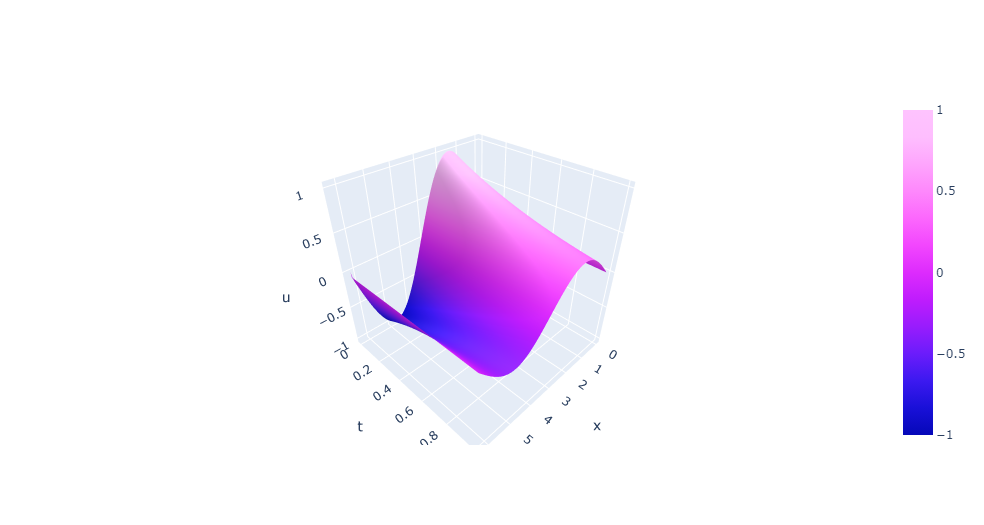

# Явный метод

$\frac{u^{n+1}_j - u^n_j}{\tau} = \Lambda u^n_j$

$\frac{u^{n+1}_j - u^n_j}{\tau} = \frac{u^n_{j+1} - 2u^n_j + u^n_{j-1}}{h^2}$

$u^{n+1}_j =  u^n_j + \frac{\tau}{h^2}\big(u^n_{j+1} - 2u^n_j + u^n_{j-1}\big)$

In [3]:
N_x = 100
N_t = 5000

h = 2 * np.pi / N_x
tau = 1 / N_t

x = [j * h for j in range(N_x)]
t = [n * tau for n in range(N_t)]

u = np.zeros((N_t, N_x))
u[0, :] = np.sin(x)
u[:, 0] = 0
u[:, -1] = 0
for n in range(N_t - 1):
        for j in range(1, N_x - 1):
            u[n + 1, j] = u[n, j] + (tau / h ** 2) * (u[n, j + 1] - 2 * u[n, j] + u[n, j - 1])
            
fig = go.Figure(data=go.Surface(x=x, y=t, z=u, colorscale='plotly3'))
fig.update_layout(scene = dict(xaxis_title='x', yaxis_title='t', zaxis_title='u'))

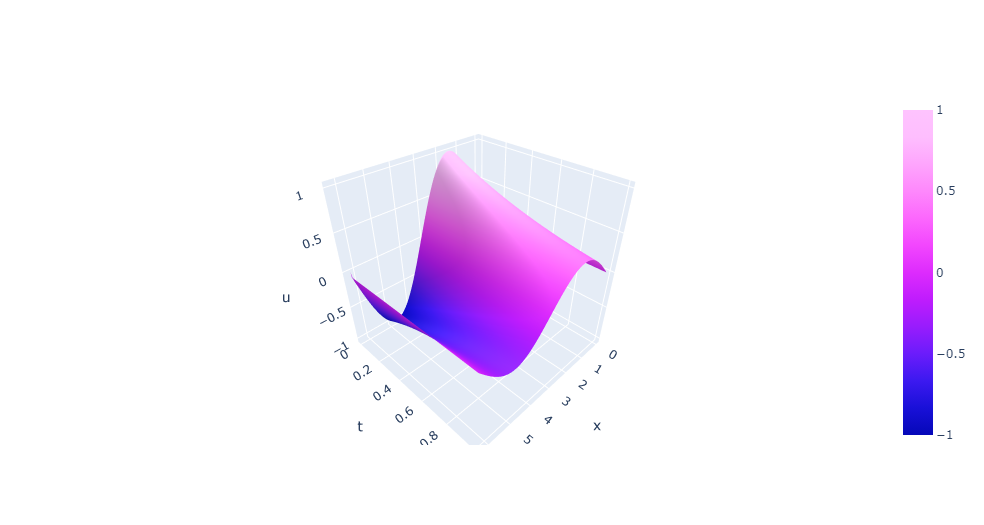

# Вычислим норму $||u||$ для различных $N_x$

In [4]:
N_x = np.array([10, 20, 40, 80, 160])
N_t = np.array([500, 1000, 2000, 4000, 8000])

norm1 = np.array([])

for i in range(len(N_x)):
    
    h = 2 * np.pi / N_x[i]
    tau = 1 / N_t[i]

    x = [j * h for j in range(N_x[i])]
    t = [n * tau for n in range(N_t[i])]
    
    # Точное решение        
    U = np.zeros((N_t[i], N_x[i]))
    U[0, :] = np.sin(x)
    U[:, 0] = 0
    U[:, -1] = 0
    for n in range(0, N_t[i] - 1):
        for j in range(1, N_x[i]):
            U[n + 1, j] = np.exp(-t[n]) * np.sin(x[j])

    # Явный метод
    u = np.zeros((N_t[i], N_x[i]))
    u[0, :] = np.sin(x)
    u[:, 0] = 0
    u[:, -1] = 0
    for n in range(N_t[i] - 1):
            for j in range(1, N_x[i] - 1):
                u[n + 1, j] = u[n, j] + (tau / h ** 2) * (u[n, j + 1] - 2 * u[n, j] + u[n, j - 1])
    
    norm1 = np.append(norm1, np.linalg.norm(u - U, np.inf) / np.linalg.norm(U, np.inf))

Text(0, 0.5, '$\\epsilon$')

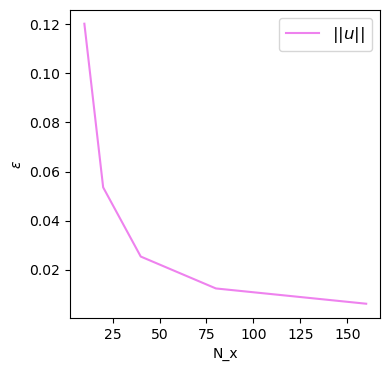

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(N_x, norm1, color = 'violet', label = '$||u||$')
ax.legend(fontsize = 12)
ax.set_xlabel('N_x')
ax.set_ylabel('$\epsilon$')

In [6]:
norm1

array([0.12025715, 0.05354648, 0.02532932, 0.01232091, 0.00609307])

# Метод прогонки

$\frac{u^{n+1}_j - u^n_j}{\tau} = \Lambda u^{n+1}_j$

$\frac{u^{n+1}_j - u^n_j}{\tau} = \frac{u^{n+1}_{j+1} - 2u^{n+1}_j + u^{n+1}_{j-1}}{h^2}$

$u^{n+1}_j =  u^n_j + \frac{\tau}{h^2}\big(u^{n+1}_{j+1} - 2u^{n+1}_j + u^{n+1}_{j-1}\big)$

$\frac{\tau}{h^2}u^{n+1}_{j+1} - (\frac{2\tau}{h^2}+1)u^{n+1}_j + c_ju^{n+1}_{j-1} = -u^n_j$

$a_ju^{n+1}_{j+1} + b_ju^{n+1}_j + \frac{\tau}{h^2}u^{n+1}_{j-1} = d_j$

$a_j = \frac{\tau}{h^2}, \quad b_j = - \big(\frac{2\tau}{h^2}+1\big), \quad c_j = \frac{\tau}{h^2},  \quad d_j = -u^n_j$

Прямой ход: 

$\alpha_j = 
\begin{cases}
\frac{c_j}{b_j}, \quad j = 1 \\
\frac{c_j}{b_j - a_j\alpha_{j-1}}, \quad j = 2, 3, ..., N_x - 1
\end{cases}$

$\beta_j = 
\begin{cases}
\frac{d_j}{b_j}, \quad j = 1 \\
\frac{d_j - a_j\beta_{j-1}}{b_j - a_j\alpha_{j-1}}, \quad j = 2, 3, ..., N_x
\end{cases}$

Обратный ход:

$u^{n+1}_{N_x} = \beta_{N_x}$

$u^{n+1}_j = \beta_j - \alpha_j u^{n+1}_{j+1}, \quad j = N_x - 1, ..., 1$

In [7]:
def Thomas_algorithm(N_x, N_t):
    
    h = 2 * np.pi / N_x
    tau = 1 / N_t
    
    x = np.linspace(0, 2 * np.pi, N_x)
    u = np.zeros((N_t, N_x))
    u[0, :] = np.sin(x)
    
    for n in range(N_t):
        
        a = np.zeros(N_x)
        c = np.zeros(N_x)
        b = np.zeros(N_x)
        
        a[1:] = - tau / h ** 2
        b += 2 * tau / h ** 2 + 1
        c[1:] = - tau / h ** 2
        d = u[n]
        
        if n != len(t) - 1:
            for j in range(1, N_x):
                
                alpha = np.zeros(N_x)
                beta = np.zeros(N_x)
                
                alpha[0] = 0
                beta[0] = u[n, 0]

                for i in range(1, N_x):
                    alpha[i] = - c[i] / (b[i] + a[i] * alpha[i - 1])
                    beta[i] = (d[i] - a[i] * beta[i - 1]) / (b[i] + a[i] * alpha[i - 1])

                uu = [beta[N_x - 1]]
                for i in range(1, N_x):
                    uu.append(beta[N_x - 1 - i] + alpha[N_x - 1 - i] * uu[i - 1])
                uu.reverse()

                u[n + 1] = np.array(uu)
            
    return u

In [8]:
N_x, N_t = 100, 1000
x = np.linspace(0, 2 * np.pi, N_x)
t = np.linspace(0, 1, N_t)
xx, tt = np.meshgrid(x, t)
u = Thomas_algorithm(N_x, N_t)
fig = go.Figure(data=go.Surface(x=xx, y=tt, z=u, colorscale='plotly3'))
fig.update_layout(scene = dict(xaxis_title='x', yaxis_title='t', zaxis_title='u'))

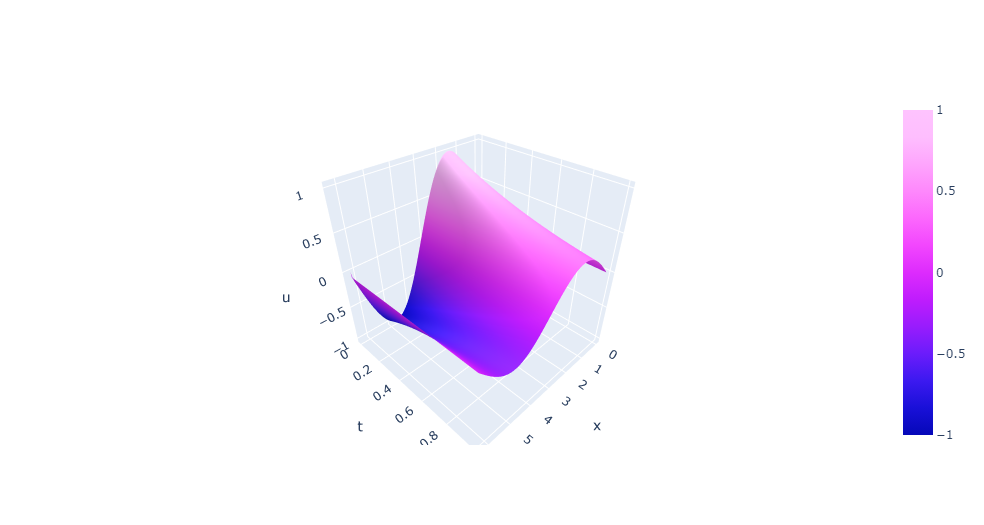

# Вычислим норму $||u||$ для различных $N_x$

In [15]:
N_x = [10, 20, 40, 80, 160]
N_t = [100, 200, 400, 800, 1600]

norm2 = np.array([])

for i in range(len(N_x)):
    
    h = 2 * np.pi / N_x[i]
    tau = 1 / N_t[i]

    x = [j * h for j in range(N_x[i])]
    t = [n * tau for n in range(N_t[i])]
    
    # Точное решение        
    U = np.zeros((N_t[i], N_x[i]))
    U[0, :] = np.sin(x)
    U[:, 0] = 0
    U[:, -1] = 0
    for n in range(0, N_t[i] - 1):
        for j in range(1, N_x[i]):
            U[n + 1, j] = np.exp(-t[n]) * np.sin(x[j])
            
    u = Thomas_algorithm(N_x[i], N_t[i])
    
    norm2 = np.append(norm2, np.linalg.norm(u - U) / np.linalg.norm(U))

Text(0, 0.5, '$\\epsilon$')

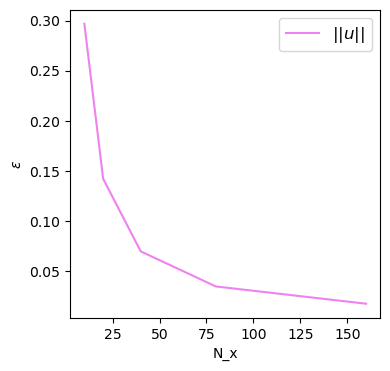

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(N_x, norm2, color = 'violet', label = '$||u||$')
ax.legend(fontsize = 12)
ax.set_xlabel('N_x')
ax.set_ylabel('$\epsilon$')

In [17]:
norm2

array([0.29698796, 0.14195472, 0.06938594, 0.03429821, 0.01705079])

# Сравним нормы $||u||$ для явного и неяного методов

Text(0, 0.5, '$\\epsilon$')

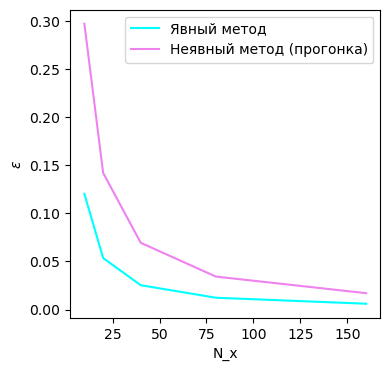

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(N_x, norm1, color = 'aqua', label = 'Явный метод')
ax.plot(N_x, norm2, color = 'violet', label = 'Неявный метод (прогонка)')
ax.legend()
ax.set_xlabel('N_x')
ax.set_ylabel('$\epsilon$')

In [19]:
norm1 # Явный метод

array([0.12025715, 0.05354648, 0.02532932, 0.01232091, 0.00609307])

In [20]:
norm2 # Неявный метод (прогонка)

array([0.29698796, 0.14195472, 0.06938594, 0.03429821, 0.01705079])